In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import seaborn as sns

In [198]:
df = pd.read_csv('../data/students_performance_preprocessed.csv')
df.drop(columns = 'Unnamed: 0',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   int64
 4   race/ethnicity_group B                         1000 non-null   int64
 5   race/ethnicity_group C                         1000 non-null   int64
 6   race/ethnicity_group D                         1000 non-null   int64
 7   race/ethnicity_group E                         1000 non-null   int64
 8   parental level of education_bachelor's degree  1000 non-null   int64
 9   parental level of education_high school        1000 non-null   int64
 10  p

Будем предсказывать результаты экзамена по математике, без знания результатов других экзаменов.Подготовим данные для этого. 

In [199]:
X = df.drop(columns = ['math score','writing score','reading score'])
y = df['math score']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [201]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию

R^2:  -0.1654341109990003
MAE:  13.025
MSE:  261.415
RMSE:  16.168333247431537
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

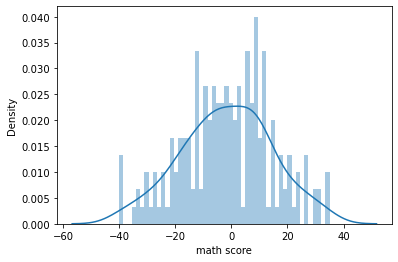

In [202]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты совсем не удовлетворительны. Алгоритм может ошибаться на 40 баллов

Обучим дерево решений

R^2:  0.3645746722222267
MAE:  9.445903232388527
MSE:  142.5303331122158
RMSE:  11.938606832969072
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

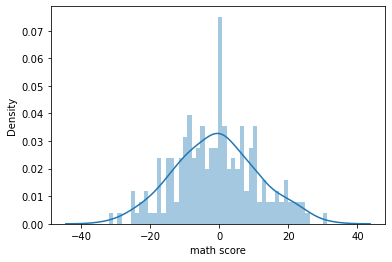

In [203]:
#http://espressocode.top/python-decision-tree-regression-using-sklearn/
DTR = DecisionTreeRegressor() 
DTR.fit(X, y) 
y_pred = DTR.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты стали лучше,но алгоритм может ошибаться на 20 баллов.

Обучим LASSO и подберем лучшее alpha

best alpha: {'alpha': 0.05}
R^2:  0.221546361985544
MAE:  10.743403934552095
MSE:  174.61258072076765
RMSE:  13.214105369670989
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

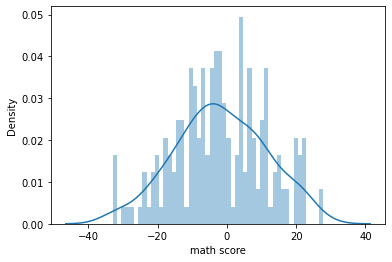

In [204]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
lasso = Lasso()
l_grid = GridSearchCV(lasso, parameters)
l_grid.fit(X_train, y_train)
y_pred = l_grid.predict(X_test)

print('best alpha:', l_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Алгоритм также может ошибаться на 20 баллов.

Обучим гребневую регрессию и подберем лучшее alpha

best alpha: {'alpha': 5}
R^2:  0.21956511690766334
MAE:  10.74761420694311
MSE:  175.0569878109207
RMSE:  13.230910316789268
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

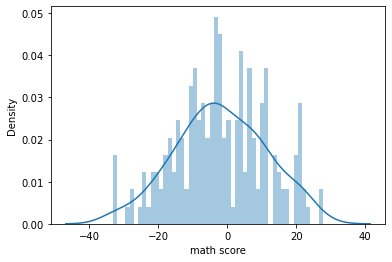

In [205]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
ridge = Ridge()
r_grid = GridSearchCV(ridge, parameters)
r_grid.fit(X_train, y_train)
y_pred = r_grid.predict(X_test)

print('best alpha:', r_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Алгоритм также может ошибаться на 20 баллов.

ОБучим эластичную сеть и подберем лучшее alpha

best alpha: {'alpha': 0.05}
R^2:  0.2211828301677814
MAE:  10.748002329253714
MSE:  174.69412344312622
RMSE:  13.217190451950302
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

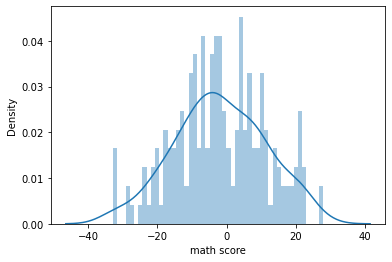

In [206]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_elastic_net.htm
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
elastic = ElasticNet()
e_grid = GridSearchCV(elastic, parameters)
e_grid.fit(X_train, y_train)
y_pred = e_grid.predict(X_test)

print('best alpha:', e_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Алгоритм также может ошибаться на 20 баллов.

Без знания результатов других экзаменов можно предсказать результат только с точностью до 20 баллов

Теперь предскажем результаты чтения со знанием результатов по математике

In [207]:
X = df.drop(columns = ['writing score','reading score'])
y = df['reading score']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [209]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

Обучим линейную регрессию

R^2:  0.1566673212882954
MAE:  10.11
MSE:  171.77
RMSE:  13.106105447462264
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

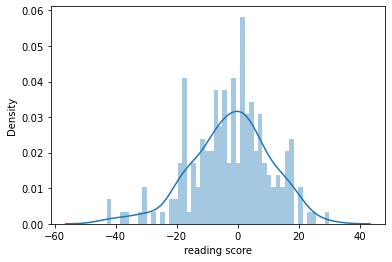

In [210]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Алгоритм угадывает результат с точностью до 20 баллов. Ошибка слишком велика

Обучим дерево решений

R^2:  0.9878322204765645
MAE:  0.37333333333333335
MSE:  2.478333333333334
RMSE:  1.5742723186708627
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

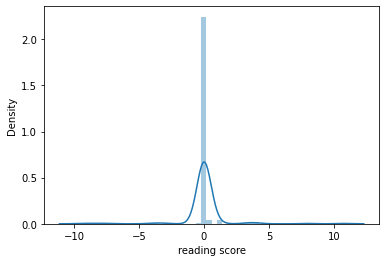

In [211]:
DTR = DecisionTreeRegressor() 
DTR.fit(X, y) 
y_pred = DTR.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты очень плохи, если машстабировать данные. Если их не масштабировать, то он работает почти без ошибок. 

Обучим LASSO

best alpha: {'alpha': 0.05}
R^2:  0.830501081754064
MAE:  4.564679385935757
MSE:  34.52353966833225
RMSE:  5.875673550184034
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

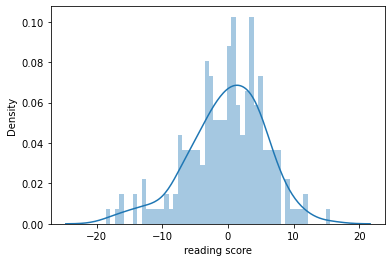

In [212]:
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
lasso = Lasso()
l_grid = GridSearchCV(lasso, parameters)
l_grid.fit(X_train, y_train)
y_pred = l_grid.predict(X_test)

print('best alpha:', l_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты неплохи. Алгоритм угадывает с точностью до 15 баллов

Обучим гребневую регрессию

best alpha: {'alpha': 5}
R^2:  0.8294936744897614
MAE:  4.586311305139727
MSE:  34.7287283799254
RMSE:  5.89310854981693
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

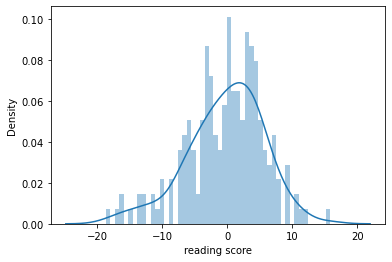

In [213]:
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
ridge = Ridge()
r_grid = GridSearchCV(ridge, parameters)
r_grid.fit(X_train, y_train)
y_pred = r_grid.predict(X_test)

print('best alpha:', r_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты неплохи. Алгоритм угадывает с точностью до 15 баллов

Обучим эластичную сеть

best alpha: {'alpha': 0.01}
R^2:  0.8297139943839447
MAE:  4.582288411198645
MSE:  34.68385362387815
RMSE:  5.889299926466485
C:\1_USER\Games\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

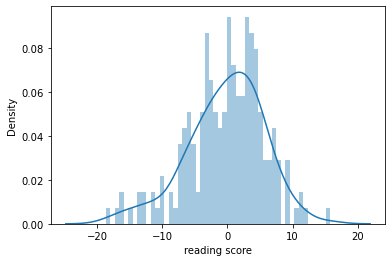

In [214]:
parameters = {'alpha':[5, 4, 3, 2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
elastic = ElasticNet()
e_grid = GridSearchCV(elastic, parameters)
e_grid.fit(X_train, y_train)
y_pred = e_grid.predict(X_test)

print('best alpha:', e_grid.best_params_)
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
sns.distplot((y_test-y_pred), bins = 50)

Результаты неплохи. Алгоритм угадывает с точностью до 15 баллов

В целом результаты стали лучше. R^2 повысились с 0.2 до 0.8, а MAE,MSE,RMSE сильно уменьшились(кроме LogisticRegression). То есть без знания хотя бы результатов одного экзамена - сложно угадать баллы.
И лучше всего подходит древо решений без масштабирования.